# COVID  Case Study
## Milestone 1: loading and merging data
### Learning outcomes
1. Load data using input Files in Various Formats to combine information from your data sources
2. Rename columns and convert column types from character to numeric to prepare for merging
3. Merge datasets to prepare for analysis

### Introduction 
The head of disease control wants to know which customers have been affected the highest due to COVID. The goal of this assignment is to create part of an analytical data chart by combining information from your data sources. 


#### Total: 50 pts 

### Group 03 - members

#### Ran Arino
#### Aleksandr Iakovlev

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Load the first data file from your data sources [13pts]

    1.1. load the data and print the first five rows. [5pts] 

In [2]:
# first data: covid cases, deaths, hospital info 
url_first = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
used_columns = ['iso_code','date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths','icu_patients', 'hosp_patients']
df_first_whole = pd.read_csv(url_first, usecols=used_columns)
df_first = df_first_whole[df_first_whole.iso_code == "CAN"].reset_index(drop=True)
df_first.head()

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients
0,CAN,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN
1,CAN,2020-01-24,3.0,1.0,NaN,NaN,NaN,NaN
2,CAN,2020-01-25,3.0,0.0,NaN,NaN,NaN,NaN
3,CAN,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN
4,CAN,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN


    1.2. show the list of columns and their types. [1pts]

In [3]:
# list of columns and types
df_first.dtypes

iso_code          object
date              object
total_cases      float64
new_cases        float64
total_deaths     float64
new_deaths       float64
icu_patients     float64
hosp_patients    float64
dtype: object

Column deletion/renaming
  
  

    1.3. Rename  one of the columns in your data frame to "renamedcol_originalname" . [3pts] 

In [4]:
# rename

df_first.rename(columns = {'iso_code':'renamedcol_iso_code'}, inplace = True)

    1.4. Drop a least significant column from one of your dataset. [3pts]


In [5]:
# drop the last column

df_first.drop(df_first.columns[-1], axis=1, inplace=True)

    1.5. Show the list of columns and their types after the deletion and renaming. [1pts]

In [6]:
# show columns and data types
df_first.dtypes

renamedcol_iso_code     object
date                    object
total_cases            float64
new_cases              float64
total_deaths           float64
new_deaths             float64
icu_patients           float64
dtype: object

#### 2. Load the second data set from your data source [10pts]

    2.1. load the data and print the first five rows. [3pts]

In [7]:
# second data: vaccine doses 
url_second = 'https://health-infobase.canada.ca/src/data/covidLive/vaccination-administration.csv'
df_second_whole = pd.read_csv(url_second)
df_second = df_second_whole[df_second_whole.prename == 'Canada'].reset_index(drop=True)
df_second.head()

,pruid,prename,report_date,numtotal_all_administered,as_of_date,numtotal_dose1_administered,numtotal_dose2_administered,numtotal_dose3_administered,numtotal_dose4_administered,updated
0,1,Canada,2021-01-19,685801,2021-01-19,253039,16193,0,0.0,1
1,1,Canada,2021-01-20,727355,2021-01-20,259348,20119,0,0.0,1
2,1,Canada,2021-01-21,766466,2021-01-21,264637,27218,0,0.0,1
3,1,Canada,2021-01-22,799783,2021-01-22,267072,31526,0,0.0,1
4,1,Canada,2021-01-23,817229,2021-01-23,268561,34012,0,0.0,1


    2.2. show the list of columns and their types. [2 pts]



In [8]:
# show columns and data type
df_second.dtypes

pruid                            int64
prename                         object
report_date                     object
numtotal_all_administered        int64
as_of_date                      object
numtotal_dose1_administered     object
numtotal_dose2_administered     object
numtotal_dose3_administered     object
numtotal_dose4_administered    float64
updated                          int64
dtype: object

    2.3. Describe the statistics of of your dataset1 and dataset2 [5pts]

In [9]:
# before start, we change some data type

# change to date format
df_first['date'] = pd.to_datetime(df_first.date)
df_second["report_date"] = pd.to_datetime(df_second.report_date)

# change to integer
for col in ['numtotal_dose1_administered', 'numtotal_dose2_administered', 'numtotal_dose3_administered', 'numtotal_dose4_administered']:
    df_second[col] = df_second[col].astype('int')

In [10]:
# statistics of first dataset
df_first.describe()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients
count,1.037000e+03,1035.000000,991.000000,988.000000,965.000000
mean,1.722028e+06,4292.949758,25249.227043,48.795547,455.473575
std,1.542125e+06,6544.190538,13547.665721,49.016680,307.803847
min,2.000000e+00,0.000000,1.000000,0.000000,42.000000
25%,1.791210e+05,797.000000,10808.000000,12.000000,228.000000
50%,1.416297e+06,2505.000000,26494.000000,32.000000,402.000000
75%,3.362047e+06,5376.000000,37226.000000,68.250000,609.000000
max,4.427242e+06,63678.000000,47850.000000,300.000000,1387.000000


In [11]:
# statistics of second dataset 
df_second.describe()

,pruid,numtotal_all_administered,numtotal_dose1_administered,numtotal_dose2_administered,numtotal_dose3_administered,numtotal_dose4_administered,updated
count,653.0,6.530000e+02,6.530000e+02,6.530000e+02,6.530000e+02,6.530000e+02,653.0
mean,1.0,6.078507e+07,2.642216e+07,2.292340e+07,9.247755e+06,1.490391e+06,1.0
std,0.0,2.892548e+07,1.008448e+07,1.159876e+07,8.898023e+06,2.471260e+06,0.0
min,1.0,6.858010e+05,2.530390e+05,1.619300e+04,0.000000e+00,0.000000e+00,1.0
25%,1.0,4.705060e+07,2.684002e+07,2.020683e+07,3.840000e+02,1.300000e+01,1.0
50%,1.0,6.842803e+07,3.161169e+07,2.895950e+07,7.567964e+06,1.851000e+03,1.0
75%,1.0,8.502039e+07,3.241961e+07,3.096486e+07,1.873527e+07,1.877906e+06,1.0
max,1.0,9.396800e+07,3.257761e+07,3.120339e+07,1.948719e+07,8.367586e+06,1.0


#### 3.  Merging [15pts]
- merge the two dataframes into a single dataframe. name the new dataset as "covid_all". [10pts] 
- print the first five observations. [1pt] 
- show the list of columns and their types. [1pt]
- Save the merged dataframe into a csv file and name it covid_collection.csv. [3pts]


In [12]:
# merge-> how:inner
covid_all = pd.merge(df_first, df_second, left_on='date', right_on='report_date')

In [13]:
# first five obs
covid_all.head()

,renamedcol_iso_code,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,pruid,prename,report_date,numtotal_all_administered,as_of_date,numtotal_dose1_administered,numtotal_dose2_administered,numtotal_dose3_administered,numtotal_dose4_administered,updated
0,CAN,2021-01-19,726920.0,5316.0,18360.0,138.0,876.0,1,Canada,2021-01-19,685801,2021-01-19,253039,16193,0,0,1
1,CAN,2021-01-20,732754.0,5834.0,18548.0,188.0,860.0,1,Canada,2021-01-20,727355,2021-01-20,259348,20119,0,0,1
2,CAN,2021-01-21,738597.0,5843.0,18688.0,140.0,849.0,1,Canada,2021-01-21,766466,2021-01-21,264637,27218,0,0,1
3,CAN,2021-01-22,744265.0,5668.0,18864.0,176.0,876.0,1,Canada,2021-01-22,799783,2021-01-22,267072,31526,0,0,1
4,CAN,2021-01-23,748567.0,4302.0,18981.0,117.0,873.0,1,Canada,2021-01-23,817229,2021-01-23,268561,34012,0,0,1


In [14]:
# list of columns and data type
covid_all.dtypes

renamedcol_iso_code                    object
date                           datetime64[ns]
total_cases                           float64
new_cases                             float64
total_deaths                          float64
new_deaths                            float64
icu_patients                          float64
pruid                                   int64
prename                                object
report_date                    datetime64[ns]
numtotal_all_administered               int64
as_of_date                             object
numtotal_dose1_administered             int32
numtotal_dose2_administered             int32
numtotal_dose3_administered             int32
numtotal_dose4_administered             int32
updated                                 int64
dtype: object

In [15]:
# save as a csv file
covid_all.to_csv('covid_collection.csv')

#### 4. Plotting v [12pts] 
    - Using import matplotlib.pyplot as plt
     - Create 3 different plots for each of the dataset(total of 6 plots). Your plot can be based on age, death rates,             area, provinces. Pick your column from your own dataset and create the following plots
    - .scatter()  [4pt] 
    - .box() [4 pt]
    - .hist() [4 pts]


### First Dataset

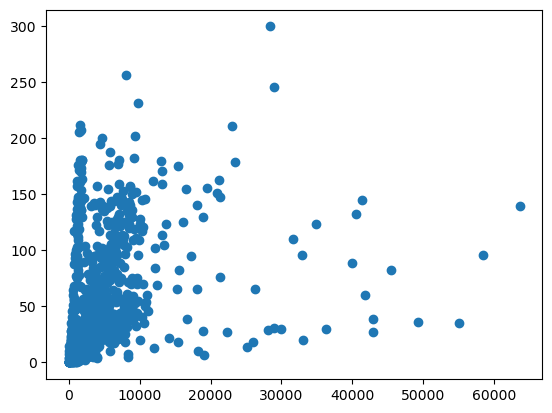

In [16]:
# df_first -> scatter (x: new_cases, y: new_deaths)
plt.scatter(df_first.new_cases, df_first.new_deaths)

<AxesSubplot:>

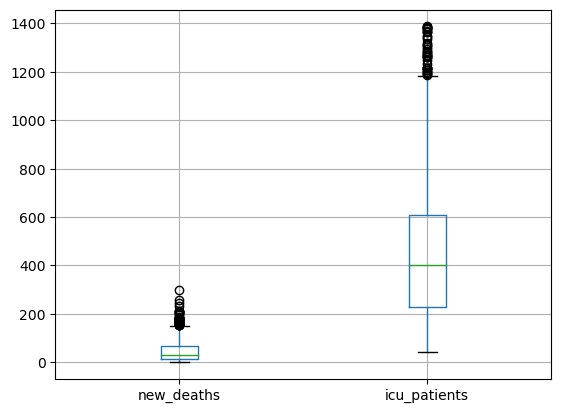

In [17]:
# df_first -> boxlpot (data: ['new_deaths', 'icu_patients'])
df_first[['new_deaths', 'icu_patients']].boxplot()

(array([148., 259., 129., 161., 100.,  54.,  38.,  23.,  26.,  27.]),
 array([  42. ,  176.5,  311. ,  445.5,  580. ,  714.5,  849. ,  983.5,
        1118. , 1252.5, 1387. ]),
 <BarContainer object of 10 artists>)

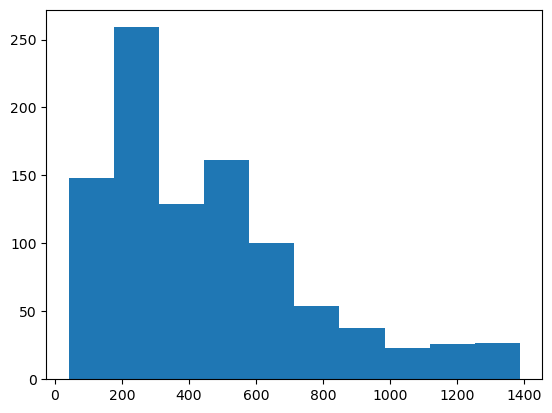

In [18]:
# df_first -> histogram (data: 'icu_patients')
plt.hist(df_first['icu_patients'])

### Second Dataset

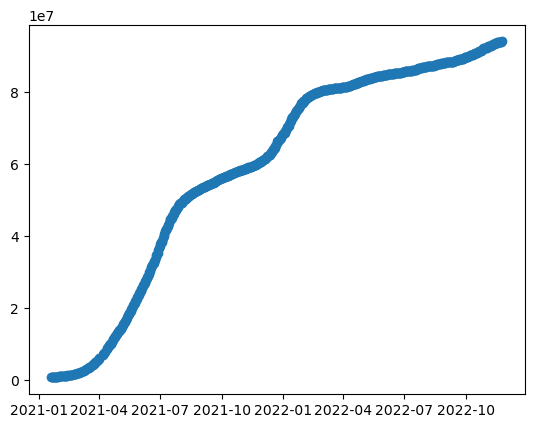

In [19]:
# df_second -> scatter (x: report_date, y: numtotal_all_administered)
plt.scatter(df_second.report_date, df_second.numtotal_all_administered)

<AxesSubplot:>

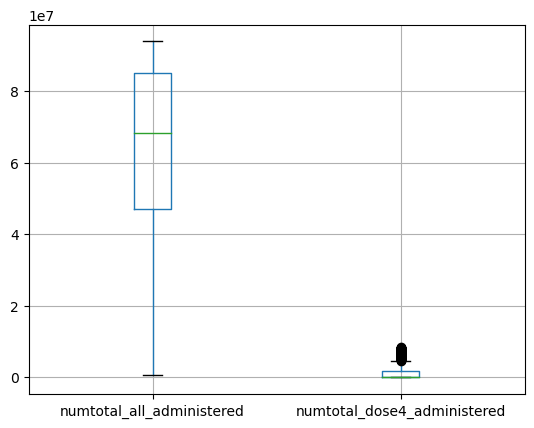

In [20]:
# df_second -> boxplot (data: ['numtotal_all_administered', 'numtotal_dose4_administered'])
df_second[['numtotal_all_administered', 'numtotal_dose4_administered']].boxplot()

(array([ 67.,  31.,  24.,  20.,  24.,  75.,  75.,  32., 128., 177.]),
 array([  685801. , 10014020.5, 19342240. , 28670459.5, 37998679. ,
        47326898.5, 56655118. , 65983337.5, 75311557. , 84639776.5,
        93967996. ]),
 <BarContainer object of 10 artists>)

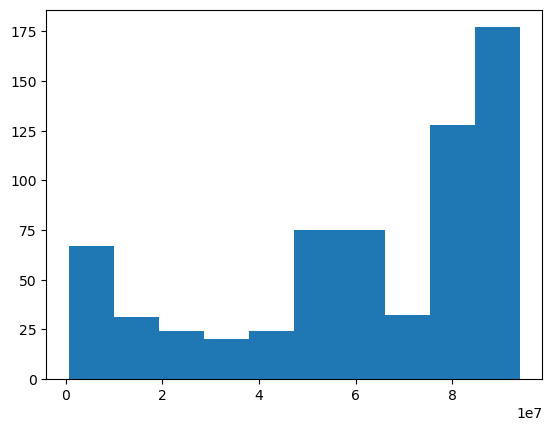

In [21]:
# df_second: histogram (data: numtotal_all_administered)
plt.hist(df_second['numtotal_all_administered'])